###### Autor: Pedro Garcez (pedroogarcez@usp.br)

# 1.Introdução

<div class = 'text-justify'>
Para entender e inferir sobre características socioecômicas da população brasileira, iniciou-se no ano de 1967 a Pesquisa Nacional por Amostra de Domicílios (PNAD) desenvolvida anualmente pelo Instituto Brasileiro de Geografia e Estatística (IBGE). Através de diferentes indicadores, o principal objetivo é analisar as informações fornecidas pela pesquisa à curto, médio e longo prazo para efetivar decisões e acompanhar o desenolvimento do País. Dessa forma, simulando as abordagens estatísticas e descritivas necessárias para obtenção de resultados, o presente projeto visa abordar aspectos presentes na sociedade e responder perguntas como: </div>

* Qual a renda média da população brasileira por cor?
* Qual sexo possui maior anos de estudo?
* Em qual idade a população brasileira possui maior renda?
* A relação entre anos de estudos e renda ocorre de maneira diretamente proporcional na sociedade?

<div class = 'text-justify'>
O projeto será densenvolvido utilizando a linguagem de programação Python para realização de estatísticas contínuas e geração de gráficos para intepretação dos resultados.
</div>

# 2. Variáveis

**UF:** \
**Sexo:** \
**Idade:** Idade do entrevistado referenciada em anos \
**Cor:** \
**Anos de estudo:** Referenciado de 1-17, sendo 1: \
**Renda:** Salário mensal advindo do principal trabalho para entrevistados maiores de 10 anos. \
**Altura:** Referenciada em metros

In [27]:
# -- Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [28]:
# Carregando o arquivo csv
df = pd.read_csv('dados.csv',sep=',')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.60
1,11,1,23,2,12,1150,1.74
2,11,1,35,8,15,880,1.76
3,11,0,46,2,6,3500,1.78
4,11,1,47,8,9,150,1.69


Lapidando e modificando alguns detalhes da planilha

In [29]:
# Adicionando colunas com variáveis qualitativas
sexo_dic = {0:'Masculino',1:'Feminino'}
df['sexo_str'] = df['Sexo'].map(sexo_dic)
# -
cor_dic = {0:'Indígena',2:'Branca',4:'Preta',6:'Amarela',8:'Parda',9:'Não declarado'}
df['cor_str'] = df['Cor'].map(cor_dic)
# -
estado_int = df['UF'].value_counts().index.tolist()
estado_str = ['SP','MG','RS','BA','RJ','PA','PR','PB','GO','CE','SC','AM','DF','MT','MA','RO','ES','MS','TO','SE','PB',
           'PI','RN','AC','AL','RR','AP']
estado_dic = dict(zip(estado_int,estado_str))
df['estado_str'] = df['UF'].map(estado_dic)

In [30]:
# Retirando o espaçamento presente no nome das colunas
df.columns = df.columns.str.replace(' ', '') 

In [31]:
# Formatando as casas decimais das colunas Renda e Altura
pd.set_option('display.precision',2)

In [32]:
# Descrevendo as colunas 
df.head()
# Insights: Criar um boxplot para análise da renda
# Histogrmas relacionados ao ano de estudo
# Groupby para saber qual a média de anos de estudos por sexo e por renda. exemplo: pessoas com mais rendar tendem a ter
# mais anos de estudos. Mulheres tem mais anos de estudo do que homens
# Groupby para identificar quais os estados com maior média de renda e maior anos de estudo
# Distribuição das idades

,UF,Sexo,Idade,Cor,AnosdeEstudo,Renda,Altura,sexo_str,cor_str,estado_str
0,11,0,23,8,12,800,1.60,Masculino,Parda,RO
1,11,1,23,2,12,1150,1.74,Feminino,Branca,RO
2,11,1,35,8,15,880,1.76,Feminino,Parda,RO
3,11,0,46,2,6,3500,1.78,Masculino,Branca,RO
4,11,1,47,8,9,150,1.69,Feminino,Parda,RO


## Análise descritiva
Analisando os resultados presentes nas colunas

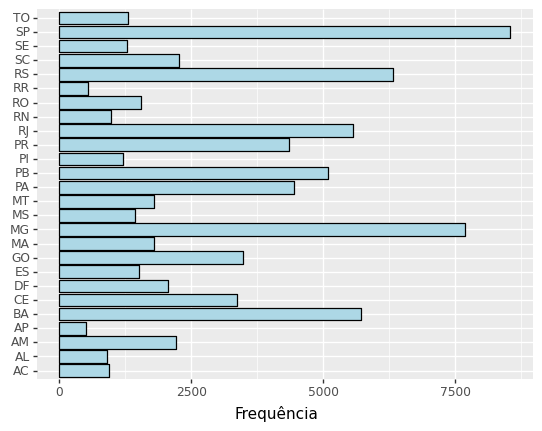

<ggplot: (201880398963)>

In [55]:
(ggplot(df, aes(x = "estado_str")) +
geom_bar(fill='lightblue',color='black')+
coord_flip()+
 labs(x='', y= 'Frequência'))
 


In [8]:
df.head()

,UF,Sexo,Idade,Cor,AnosdeEstudo,Renda,Altura,sexo_str,cor_str,estado_str
0,11,0,23,8,12,800,1.60,Masculino,Parda,RO
1,11,1,23,2,12,1150,1.74,Feminino,Branca,RO
2,11,1,35,8,15,880,1.76,Feminino,Parda,RO
3,11,0,46,2,6,3500,1.78,Masculino,Branca,RO
4,11,1,47,8,9,150,1.69,Feminino,Parda,RO


In [9]:
df[['sexo_str','Renda']].groupby('sexo_str').agg(['mean','std'])

Renda         
              mean      std
sexo_str                   
Feminino   1566.85  2570.66
Masculino  2192.44  3590.31

In [10]:
df[['cor_str','Renda']].groupby('cor_str').agg(['min','mean','max'])

Renda                 
           min     mean     max
cor_str                        
Amarela      0  4182.92   50000
Branca       0  2679.02  200000
Indígena     0  1472.89  120000
Parda        0  1513.60  100000
Preta        0  1442.29   50000

In [11]:
df[['sexo_str','AnosdeEstudo']].groupby('sexo_str').agg(['mean','std','var'])

AnosdeEstudo             
                  mean   std    var
sexo_str                           
Feminino         10.26  4.44  19.69
Masculino         9.12  4.54  20.62

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 137'. Pick better value with 'binwidth'.


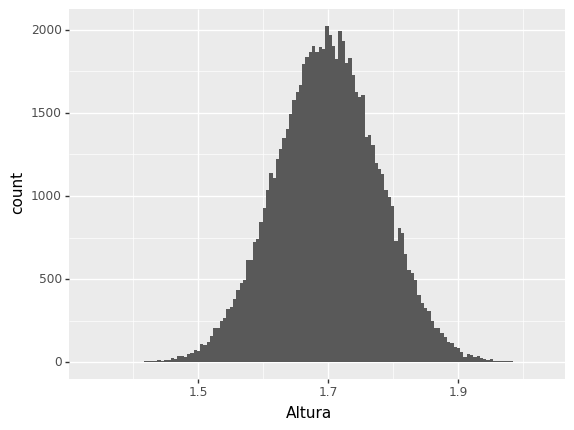

<ggplot: (201878744522)>

In [12]:
(ggplot(df, aes(x = "Altura")) +
 geom_histogram())

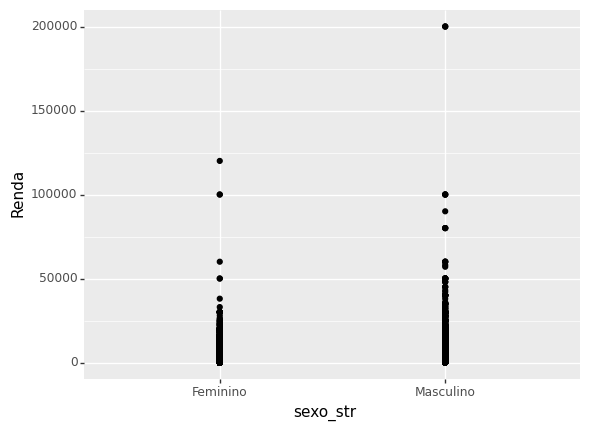

<ggplot: (201878670276)>

In [13]:
(ggplot(df, aes(x = "sexo_str", y = "Renda")) +
  geom_point()) 

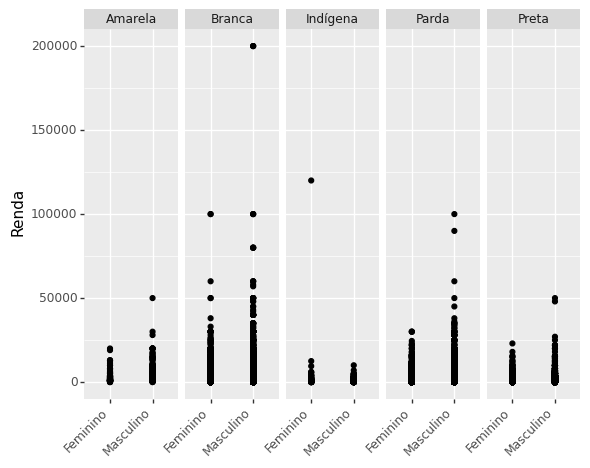

<ggplot: (201883857475)>

In [14]:
(ggplot(df) +
  geom_point(aes(x = "sexo_str", y = "Renda"))+
  facet_grid("~cor_str") +
  theme(axis_text_x  = element_text(angle = 45, hjust = 1))+
  labs(x = '')) 

Através do gráfico acima, nota-se que na maioria dos casos o salário de pessoas do sexo Masculino é maior quando comparados com o sexo Feminino. Além disso, assim como ilustrado na tabela X, é possível observar a ordem

# 5. Agradecimentos

<div class = 'text-justify'>
A professora Bruna Garbes, que durante as aulas esteve disponível para me auxiliar e compartilhar seus conhecimentos relacionados ao tema de estudo.
Aos orientadores da matéria, responsáveis por sanar minhas dúvidas e capacitar a consolidação de minhas ideias no presente neste trabalho.
</div>

# 6. Referências
#### [1. Kaggle (Data download): Statistical Analysis | Descriptive Statistics-BR](https://www.kaggle.com/code/upadorprofzs/statistical-analysis-descriptive-statistics-br/notebook) 
#### [2. GGplot2: Modify axis, legend, and plot labels](https://ggplot2.tidyverse.org/reference/labs.html)